In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from utils.simulate_markov import simulate_positive_recurrent_modulated_random_walk
from depth.multivariate import betaSkeleton, mahalanobis

## Section 2

This notebook contains the code used to produce the plots that appear in Example 2.

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7
np.random.seed(random_seed)

In [4]:
# Number of steps on each trajectory
n_steps = 4

# Number of independent trajectories
M = 10**3

initial_point = 0

In [5]:
trajectories = simulate_positive_recurrent_modulated_random_walk(n_steps=6, num_processes=M, initial_point=initial_point, seed=random_seed)

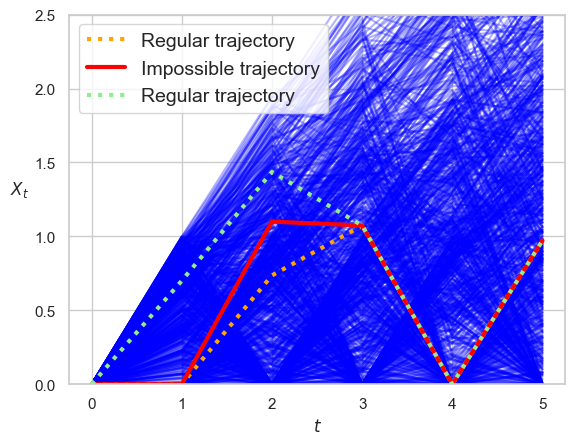

In [6]:
anomaly_starts_at = 1

linewidth=3

for t in trajectories:
    # plt.scatter(np.arange(1,len(t)),t[1:], color="blue")
    plt.plot(t, color="blue", alpha=0.3)

base_sample_trajectory = trajectories[3]
plt.plot(base_sample_trajectory, color="orange", linestyle="dotted", linewidth=linewidth, label="Regular trajectory")

impossible_trajectory = np.copy(base_sample_trajectory)
impossible_trajectory[anomaly_starts_at+1]=impossible_trajectory[anomaly_starts_at]+1.1
plt.plot(impossible_trajectory, color="red", linestyle='-', label="Impossible trajectory", linewidth=linewidth)


other_regular_trajectory = np.copy(base_sample_trajectory)
other_regular_trajectory[anomaly_starts_at]=other_regular_trajectory[anomaly_starts_at]+0.7
other_regular_trajectory[anomaly_starts_at+1]=other_regular_trajectory[anomaly_starts_at+1]+0.7
plt.plot(other_regular_trajectory, color="lightgreen", linestyle="dotted", label="Regular trajectory", linewidth=linewidth)

plt.xlabel(r"$t$")
plt.ylabel(r"$X_t$", rotation=0, ha='right')
plt.ylim(0,2.5)

plt.legend(fontsize=14)


In [7]:
x = np.array([base_sample_trajectory, impossible_trajectory, other_regular_trajectory])

In [8]:
random_seed+=1
# Simulate many trajectories to obtain the histogram
samples = simulate_positive_recurrent_modulated_random_walk(n_steps=6, num_processes=M, initial_point=initial_point, seed=random_seed)

In [9]:
lens_depths = betaSkeleton(data=samples, x=trajectories)

In [10]:
mahalonbis_depths = mahalanobis(data=samples, x=trajectories)

/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [11]:
x_lens_depth = betaSkeleton(data=samples, x=x)

In [12]:
x_mahalanobis_depth= mahalanobis(data=samples, x=x)

/Users/carlos/.virtualenvs/neurips2024/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


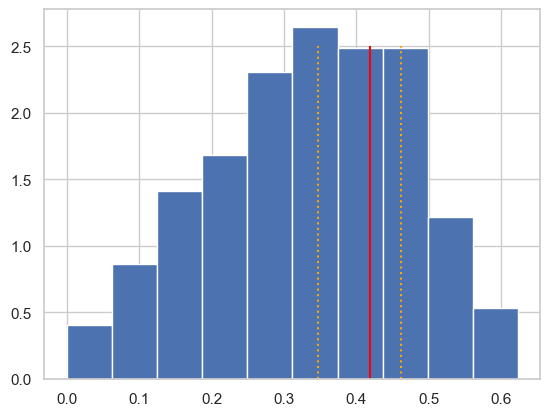

In [13]:
plt.hist(lens_depths, density=True)
plt.vlines(x=x_lens_depth[0], ymin=0, ymax=2.5, colors="orange", linestyles="dotted")
plt.vlines(x=x_lens_depth[1], ymin=0, ymax=2.5, colors="red")
plt.vlines(x=x_lens_depth[2], ymin=0, ymax=2.5, colors="orange", linestyles="dotted")

(0.0, 0.4)

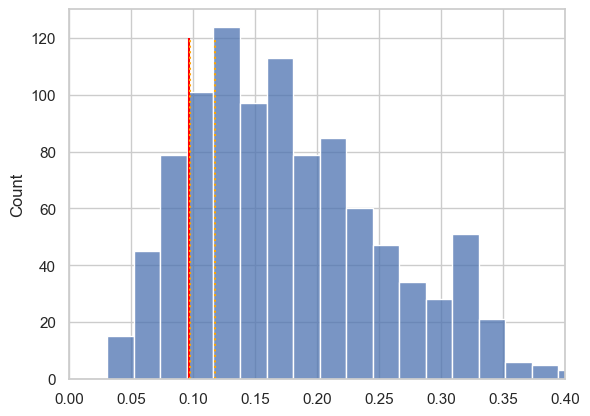

In [14]:
sns.histplot(mahalonbis_depths)
plt.vlines(x=x_mahalanobis_depth[0], ymin=0, ymax=120, colors="orange", linestyles="dotted")
plt.vlines(x=x_mahalanobis_depth[1], ymin=0, ymax=120, colors="red")
plt.vlines(x=x_mahalanobis_depth[2], ymin=0, ymax=120, colors="orange", linestyles="dotted")
plt.xlim(0,0.4)

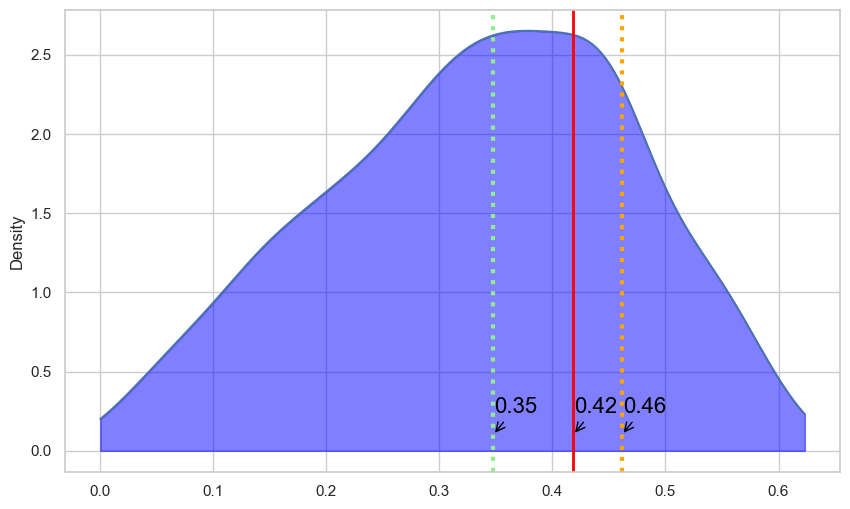

In [15]:
# Perform Kernel Density Estimation
kde = gaussian_kde(lens_depths)
x_range = np.linspace(min(lens_depths), max(lens_depths), 1000)
kde_values = kde(x_range)

# Plot the KDE
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='KDE')
plt.fill_between(x_range, kde_values, alpha=0.5, color='blue')

# Emphasize specific values
point = x_lens_depth[0]
plt.axvline(point, color="orange", linestyle="dotted", linewidth=3)
plt.annotate(f'{point:.2f}', xy=(point, 0.1), xytext=(point+0.02, 0.2+0.04),
                arrowprops=dict(facecolor='black',  edgecolor='black', arrowstyle='->'),
                ha='center', color="black",fontsize=16)

point = x_lens_depth[2]
plt.axvline(point, color="lightgreen", linestyle="dotted", linewidth=3)
plt.annotate(f'{point:.2f}', xy=(point, 0.1), xytext=(point+0.02, 0.2+0.04),
                arrowprops=dict(facecolor='black',  edgecolor='black', arrowstyle='->'),
                ha='center', color="black",fontsize=16)

plt.axvline(x_lens_depth[1], color="red", linewidth=2)
plt.annotate(f'{x_lens_depth[1]:.2f}', xy=(x_lens_depth[1], 0.1), xytext=(x_lens_depth[1]+0.02, 0.2+0.04),
                arrowprops=dict(facecolor='black',  edgecolor='black', arrowstyle='->'),
                 ha='center', color="black",fontsize=16)

plt.ylabel('Density')
plt.grid(True)
plt.show()


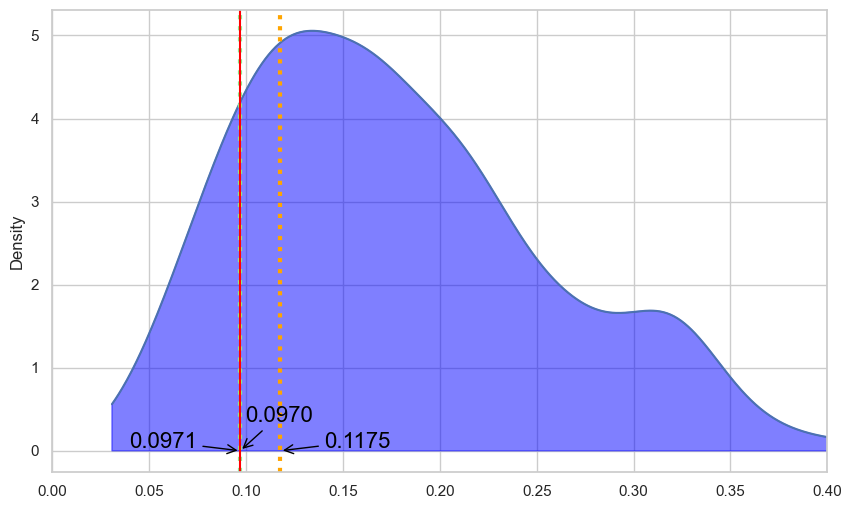

In [16]:
# Perform Kernel Density Estimation
kde = gaussian_kde(mahalonbis_depths)
x_range = np.linspace(min(mahalonbis_depths), max(mahalonbis_depths), 1000)
kde_values = kde(x_range)

# Plot the KDE
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='KDE')
plt.fill_between(x_range, kde_values, alpha=0.5, color='blue')

# Emphasize specific values
point = x_mahalanobis_depth[0]
plt.axvline(point, color="orange", linestyle="dotted", linewidth=3)
plt.annotate(f'{point:.4f}', xy=(point, 0), xytext=(point+ 0.04, 0+0.04),
                arrowprops=dict(facecolor='black',  edgecolor='black', arrowstyle='->'),
                ha='center', color="black",fontsize=16)

point = x_mahalanobis_depth[2]
plt.axvline(point, color="lightgreen", linestyle="dotted", linewidth=3)
plt.annotate(f'{point:.4f}', xy=(point, 0), xytext=(point-0.04, 0+0.04),
                arrowprops=dict(facecolor='black',  edgecolor='black', arrowstyle='->'),
                ha='center', color="black",fontsize=16)

plt.axvline(x_mahalanobis_depth[1], color="red", alpha=1)
plt.annotate(f'{x_mahalanobis_depth[1]:.4f}', xy=(x_mahalanobis_depth[1], 0), xytext=(x_mahalanobis_depth[1]+0.02, 0+0.35),
                arrowprops=dict(facecolor='black',  edgecolor='black', arrowstyle='->'),
                 ha='center', color="black", fontsize=16)

plt.ylabel('Density')
plt.grid(True)
plt.xlim(0,0.4)
plt.show()
